# Currencies Trend Following Portfolio

    1. The Security closes with 50/100 ma > 0, buy.
    2. If the Security closes 50/100 ma < 0, sell your long position.
    
    (For a Portfolio of securities.)

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd
from talib.abstract import *

import pinkfish as pf
import strategy

# Format price data.
pd.options.display.float_format = '{:0.2f}'.format
pd.set_option('display.max_rows', None)

%matplotlib inline

In [2]:
# Set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### MICRO FUTURES

In [3]:
# symbol: (description, multiplier)


currencies = {
#     'BTCUSD=X': 'Bitcoin USD Futures', 1),
#     'ETHUSD=X': 'Ethereum USD 
    'EURUSD=X': 'EUR/USD Futures',
    'JPY=X':    'USD/JPY Futures',
    'GBPUSD=X': 'GBP/USD Futures',
    'AUDUSD=X': 'AUD/USD Futures',
    'NZDUSD=X': 'NZD/USD Futures',
    'EURJPY=X': 'EUR/JPY Futures',
    'GBPJPY=X': 'GBP/JPY Futures',
    'EURGBP=X': 'EUR/GBP Futures',
    'EURCAD=X': 'EUR/CAD Futures',
    'EURSEK=X': 'EUR/SEK Futures',
    'EURCHF=X': 'EUR/CHF Futures',
    'EURHUF=X': 'EUR/HUF Futures',
    'EURJPY=X': 'EUR/JPY Futures',
    'CNY=X':    'USD/CNY Futures',
    'HKD=X':    'USD/HKD Futures',
    'SGD=X':    'USD/SGD Futures',
    'INR=X':    'USD/INR Futures',
    'MXN=X':    'USD/MXN Futures',
    'PHP=X':    'USD/PHP Futures',
    'IDR=X':    'USD/IDR Futures',
    'THB=X':    'USD/THB Futures',
    'MYR=X':    'USD/MYR Futures',
    'ZAR=X':    'USD/ZAR Futures',
    'RUB=X':    'USD/RUB Futures'
}

symbols = list(currencies)
#symbols = ['EURUSD=X']
capital = 100_000
start = datetime.datetime(1900, 1, 1)
end = datetime.datetime.now()

In [4]:
options = {
    'use_adj' : False,
    'use_cache' : True,
    'force_stock_market_calendar' : True,
    'stop_loss_pct' : 1.0,
    'margin' : 1,
    'lookback' : 1,
    'sma_timeperiod': 20,
    'sma_pct_band': 0,
    'use_regime_filter' : True,
    'use_vola_weight' : False
}

Run Strategy

In [5]:
s = strategy.Strategy(symbols, capital, start, end, options=options)
s.run()




View log DataFrames: raw trade log, trade log, and daily balance

In [6]:
s.rlog.head()

,date,seq_num,price,shares,entry_exit,direction,symbol
0,2007-03-02,0,11.13,390,entry,LONG,MXN=X
1,2007-03-02,1,0.78,5544,entry,LONG,AUDUSD=X
2,2007-03-02,2,0.69,6309,entry,LONG,NZDUSD=X
3,2007-03-02,3,1.55,2808,entry,LONG,EURCAD=X
4,2007-03-02,4,9.27,469,entry,LONG,EURSEK=X


In [7]:
s.tlog.head()

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
0,2007-03-02,0.78,2007-03-05,0.77,-0.01,-79.97,5544,-79.97,LONG,AUDUSD=X
1,2007-03-02,0.69,2007-03-05,0.67,-0.02,-97.81,6309,-177.78,LONG,NZDUSD=X
2,2007-03-02,1.55,2007-03-09,1.54,-0.01,-25.55,2808,-203.33,LONG,EURCAD=X
3,2007-03-02,7.82,2007-03-09,7.81,-0.01,-5.00,555,-208.33,LONG,HKD=X
4,2007-03-02,11.13,2007-03-22,10.98,-0.15,-58.62,390,-266.94,LONG,MXN=X


In [8]:
s.dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2021-06-28,102922.55,102922.55,102922.55,9421,67141.23,1.00,X
2021-06-29,102959.20,102959.20,102959.20,5333,71625.56,1.00,X
2021-06-30,103001.23,103001.23,103001.23,9419,67147.59,1.00,O
2021-07-01,103035.54,103035.54,103035.54,5333,71628.30,1.00,X
2021-07-02,103116.58,103116.58,103116.58,4087,98634.21,1.00,X


Generate strategy stats - display all available stats

In [9]:
pf.print_full(s.stats)

start                                                  2007-03-02
end                                                    2021-07-02
beginning_balance                                          100000
ending_balance                                          103116.58
total_net_profit                                          3116.58
gross_profit                                             68847.16
gross_loss                                              -65730.58
profit_factor                                                1.05
return_on_initial_capital                                    3.12
annual_return_rate                                           0.21
trading_period                           14 years 4 months 0 days
pct_time_in_market                                          99.97
margin                                                          1
avg_leverage                                                 1.00
max_leverage                                                 1.00
min_levera

View Performance by Symbol

,cumul_total,weight,pct_cumul_total,relative_performance
MXN=X,"$1,078.19",0.04,0.35,7.96
EURCHF=X,-$581.68,0.04,-0.19,-4.29
AUDUSD=X,$529.79,0.04,0.17,3.91
GBPJPY=X,$7.21,0.04,0.00,0.05
CNY=X,$534.74,0.04,0.17,3.95
NZDUSD=X,-$837.22,0.04,-0.27,-6.18
PHP=X,-$759.72,0.04,-0.24,-5.61
EURJPY=X,-$420.35,0.04,-0.13,-3.10
EURCAD=X,-$224.53,0.04,-0.07,-1.66
THB=X,"-$1,747.08",0.04,-0.56,-12.89


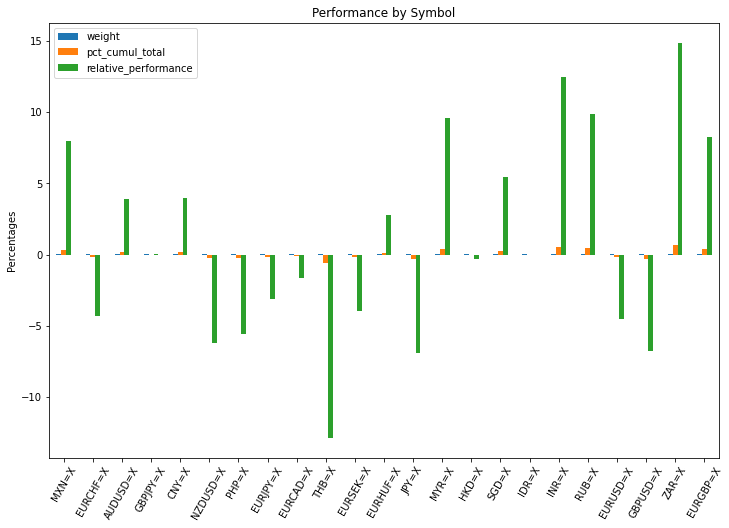

In [10]:
weights = {symbol: 1 / len(symbols) for symbol in symbols}
totals = s.portfolio.performance_per_symbol(weights=weights)
totals

,MXN=X,EURCHF=X,AUDUSD=X,GBPJPY=X,CNY=X,NZDUSD=X,PHP=X,EURJPY=X,EURCAD=X,THB=X,...,MYR=X,HKD=X,SGD=X,IDR=X,INR=X,RUB=X,EURUSD=X,GBPUSD=X,ZAR=X,EURGBP=X
MXN=X,1.00,-0.09,-0.31,-0.26,0.05,-0.28,0.07,-0.23,0.13,0.05,...,0.26,0.01,0.23,0.01,0.13,0.02,-0.19,-0.22,0.35,0.08
EURCHF=X,-0.09,1.00,0.19,0.27,-0.00,0.17,-0.06,0.37,0.08,-0.07,...,-0.02,-0.01,-0.13,0.00,-0.06,-0.00,0.20,0.16,-0.20,0.11
AUDUSD=X,-0.31,0.19,1.00,0.45,-0.10,0.83,-0.20,0.51,-0.08,-0.19,...,-0.23,-0.11,-0.69,-0.03,-0.33,-0.04,0.45,0.55,-0.63,0.02
GBPJPY=X,-0.26,0.27,0.45,1.00,-0.05,0.40,-0.11,0.78,-0.11,-0.10,...,-0.11,-0.04,-0.28,-0.01,-0.22,-0.02,0.24,0.68,-0.39,-0.46
CNY=X,0.05,-0.00,-0.10,-0.05,1.00,-0.11,0.13,-0.05,-0.01,0.06,...,0.05,0.05,0.15,0.02,0.09,0.04,-0.08,-0.11,0.11,0.01
NZDUSD=X,-0.28,0.17,0.83,0.40,-0.11,1.00,-0.18,0.46,-0.04,-0.19,...,-0.21,-0.11,-0.68,-0.04,-0.29,-0.03,0.46,0.54,-0.59,0.03
PHP=X,0.07,-0.06,-0.20,-0.11,0.13,-0.18,1.00,-0.13,0.01,0.16,...,0.11,0.10,0.27,0.02,0.25,0.03,-0.15,-0.15,0.18,-0.01
EURJPY=X,-0.23,0.37,0.51,0.78,-0.05,0.46,-0.13,1.00,0.18,-0.17,...,-0.15,-0.05,-0.39,-0.01,-0.24,-0.01,0.50,0.43,-0.44,0.19
EURCAD=X,0.13,0.08,-0.08,-0.11,-0.01,-0.04,0.01,0.18,1.00,-0.08,...,-0.03,-0.02,-0.11,-0.02,0.04,0.03,0.41,0.13,0.09,0.42
THB=X,0.05,-0.07,-0.19,-0.10,0.06,-0.19,0.16,-0.17,-0.08,1.00,...,0.11,0.04,0.27,0.03,0.16,0.02,-0.20,-0.16,0.18,-0.09


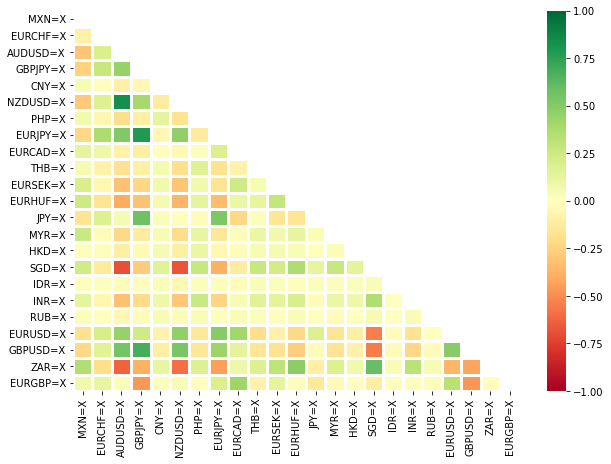

In [11]:
corr_df = s.portfolio.correlation_map(s.ts)
corr_df

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [12]:
benchmark = pf.Benchmark('SPY', s.capital, s.start, s.end, use_adj=True)
benchmark.run()

Plot Equity Curves: Strategy vs Benchmark

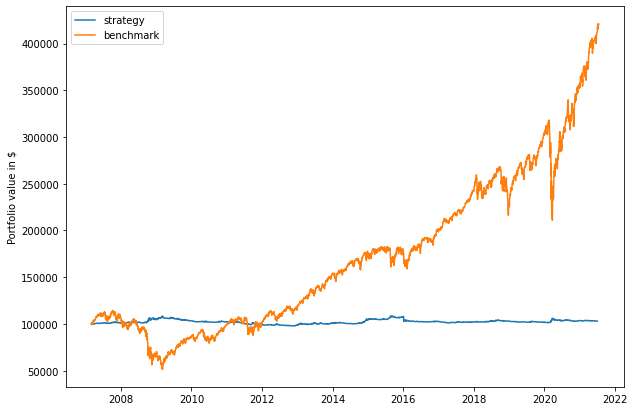

In [13]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,0.21,10.51
max_closed_out_drawdown,-9.57,-55.17
annualized_return_over_max_drawdown,0.02,0.19
best_month,4.81,23.62
worst_month,-4.47,-30.99
sharpe_ratio,0.10,0.59
sortino_ratio,0.11,0.71
monthly_std,0.69,4.79
annual_std,2.54,17.34


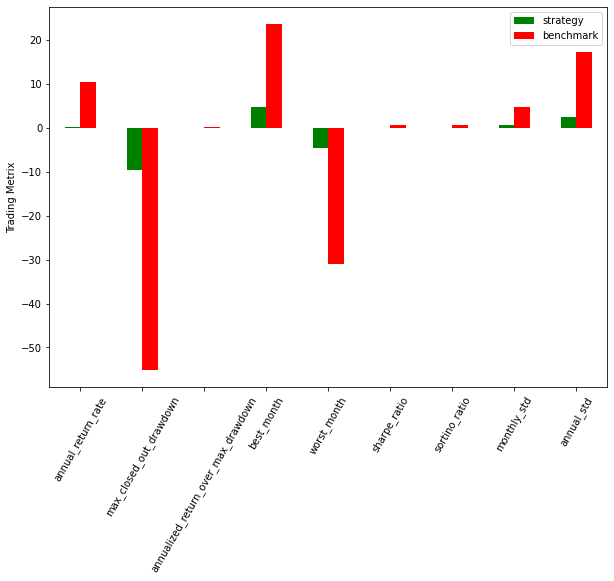

In [14]:
df = pf.plot_bar_graph(s.stats, benchmark.stats)
df

Analysis: Kelly Criterian

In [15]:
kelly = pf.kelly_criterian(s.stats, benchmark.stats)
kelly

sharpe_ratio            0.10
sharpe_ratio_max        0.15
sharpe_ratio_min        0.05
strategy risk           0.03
instrument risk         0.17
optimal target risk     0.10
half kelly criterian    0.05
aggressive leverage     0.57
moderate leverage       0.28
conservative leverage   0.14
dtype: float64